In [1]:
# Run this in your terminal to install packages
# pip install pandas matplotlib seaborn requests matplotlib-venn

### 1.2 Run nf-core/mhcquant

**Aim of this task**

Create a samplesheet of UPN49for the nf-core/mhcquant pipeline. The samplesheet tells the pipeline:
- Which files to process
- How to group replicates
- What conditions each sample belongs to

The following columns are required:
- `ID`: Unique identifier for the run (e.g. 1,2,3)
- `Sample`: Sample Name (Patient ID)
- `Condition`: Condition (e.g., Tumor/Healthy)
- `ReplicateFileName`: Path to the raw file

**See**: [nf-core/mhcquant Usage](https://nf-co.re/mhcquant/usage)

- Use the optional `Fasta` column to specify the path to the fasta file:
`https://raw.githubusercontent.com/nf-core/test-datasets/mhcquant/testdata/UP000005640_9606.fasta`

- Generate a samplesheet of UPN49 for the `nf-core/mhcquant` pipeline.

>**Note**: The samplesheet columns need to be separated by a tab. GitHub Codespaces sometimes uses spaces instead of tabs. Please use the Editor of your choice to generate the samplesheet with tab-separation and copy+paste the samplesheet into the MHCquant codespace.

------------

You can run the pipeline with a simple command in the terminal:
```bash
nextflow run nf-core/mhcquant --input samplesheet.tsv --outdir UPN49_class1 -profile singularity
```

Different input data will vary the pipeline parameters of course. For our purpose, the default parameters are sufficient. If you are curious about all parameters you can check out the [parameter documentation](https://nf-co.re/mhcquant/3.1.0/parameters/).

Once the pipeline is finished, you can find the results in the `UPN49_class1` directory. Quickly check out the content of the folder, the most important files are:
- The tsv file(s)
- The MultiQC report <-- Visual summary and quality control of your input runs

A detailed description of the output files can be found [here](https://nf-co.re/mhcquant/3.1.0/output/).

---------------

### Exercise 1: Understanding the Samplesheet

1. If you had two patients (UPN49 and UPN52), each with 3 replicates, how many rows would the samplesheet have?

2. What would happen if you gave each replicate a different `Sample` value instead of grouping them?

<details>
<summary><b>Click to reveal the answers</b></summary>

**Answer 1**: **6 rows** (2 patients × 3 replicates each)

```tsv
ID	Sample	Condition	ReplicateFileName
UPN49_1	UPN49	Tumor	...
UPN49_2	UPN49	Tumor	...
UPN49_3	UPN49	Tumor	...
UPN52_1	UPN52	Tumor	...
UPN52_2	UPN52	Tumor	...
UPN52_3	UPN52	Tumor	...
```

**Answer 2**: The pipeline would treat each replicate as a separate sample:
- No replicate-level summarization
- Peptide frequencies calculated per-replicate instead of per-patient
- Loss of statistical power for quantification

This is a common mistake! Always check that replicates share the same `Sample` value.

</details>


## 2. Reference: The HLA Ligand Atlas

To know what is "tumor-specific", we need to know what is "benign".
We will use the **HLA Ligand Atlas** as our healthy baseline.

### 2.1 Get the Data

**Aim of this task**

We want to download and explore the HLA Ligand Atlas data:

- Download the **donor metadata** (information about each sample)
- Download the **peptide data** (sequences with their HLA associations)
- Join these tables to create a complete dataset

The HLA Ligand Atlas contains peptides identified from healthy human tissues - these are the "self" peptides that our immune system sees every day.

Get the data: https://hla-ligand-atlas.org/data

<details>
<summary><b>Deep Dive: What is the HLA Ligand Atlas?</b></summary>

**The Immunopeptidome and Why It Matters**

Every cell in your body constantly chops up its proteins and presents peptide fragments on its surface via HLA molecules. This is how T cells distinguish "self" from "non-self" (like viruses or cancer).

```
Protein → Proteasome → Peptides → HLA Loading → Cell Surface → T Cell Recognition
```

**The HLA Ligand Atlas** is a database of peptides identified from healthy human tissues:

| Feature | Description |
|---------|-------------|
| **Source** | Benign human tissue samples |
| **Method** | Immunoprecipitation + LC-MS/MS |
| **Content** | ~180,000 unique peptides |
| **HLA Types** | Class I (A, B, C) and Class II (DR, DQ, DP) |
| **Tissues** | 29 different tissue types |

**Why is this useful?**

1. **Basic research**: Which peptides humans present T cells
2. **Cancer immunotherapy**: Identify tumor-specific peptides not in normal tissues
3. **Vaccine design**: Help prioritizing peptides for infectios or cancer vaccines using a benign reference

</details>



<details>
<summary><b>New to Python? Understanding pandas DataFrames</b></summary>

A DataFrame is like an Excel spreadsheet in Python:

**1. Loading data:**
```python
df = pd.read_csv("file.csv")           # From CSV
df = pd.read_csv("file.tsv", sep="\t") # From TSV (tab-separated)
```

**2. Exploring data:**
```python
df.head()              # First 5 rows
df.shape               # (rows, columns)
df.columns             # Column names
df.info()              # Data types and missing values
df['column'].unique()  # Unique values in a column
```

**3. Filtering data:**
```python
# Single condition
filtered = df[df['column'] == 'value']

# Multiple conditions (use & for AND, | for OR)
filtered = df[(df['col1'] == 'A') & (df['col2'] > 10)]

# String methods
filtered = df[df['name'].str.startswith('AUT')]
```

**4. Merging tables:**
```python
merged = pd.merge(df1, df2, on='common_column')
```

</details>

In [3]:
# Load HLA Ligand Atlas DataFrames using pandas
base_url = 'http://hla-ligand-atlas.org/rel/2020.12/'

df_peptides = pd.read_csv(base_url + 'peptides.tsv.gz', sep='\t')
df_donors = pd.read_csv(base_url + 'donors.tsv.gz', sep='\t')
df_sample_hits = pd.read_csv(base_url + 'sample_hits.tsv.gz', sep='\t')


In [4]:
# Explore the sample_hits table
df_sample_hits.head()

,peptide_sequence_id,donor,tissue,hla_class
0,1,AUT01-DN02,Lung,HLA-II
1,1,AUT01-DN03,Adrenal gland,HLA-II
2,1,AUT01-DN03,Aorta,HLA-II
3,1,AUT01-DN03,Esophagus,HLA-II
4,1,AUT01-DN03,Heart,HLA-II


In [5]:
# Explore the peptides table
df_peptides.head()

,peptide_sequence_id,peptide_sequence
0,1,LLPKKTESHHKAKGK
1,2,PKGKKAKGKKVAPAPAVVKK
2,3,PEPAKSAPAPKKGSKKAVTK
3,4,IKKWEKQVSQKKKQKN
4,5,IKKWEKQVSQKKK


In [6]:
# Join sample_hits and peptide tables. This connects each peptide to its donor's HLA allele information
df_atlas = pd.merge(df_sample_hits, df_peptides, on='peptide_sequence_id')
df_atlas = pd.merge(df_atlas, df_donors, on='donor')
df_atlas.head()

,peptide_sequence_id,donor,tissue,hla_class,peptide_sequence,hla_allele
0,1,AUT01-DN02,Lung,HLA-II,LLPKKTESHHKAKGK,A*11:01
1,1,AUT01-DN02,Lung,HLA-II,LLPKKTESHHKAKGK,A*68:01
2,1,AUT01-DN02,Lung,HLA-II,LLPKKTESHHKAKGK,B*15:01
3,1,AUT01-DN02,Lung,HLA-II,LLPKKTESHHKAKGK,B*35:03
4,1,AUT01-DN02,Lung,HLA-II,LLPKKTESHHKAKGK,C*04:01


### 2.2 Excursion: HLA Peptide Properties (Optional)

Now that we have a bigger dataset at hand, let's explore the HLA Ligand Atlas in a bit more detail. This analysis helps us understand:
- Are our peptides the expected length for their HLA class?
- Which alleles are most represented?
- How much proteins do these peptides cover?

#### 2.2.1 Peptide Length Distribution

**Aim of this task**

HLA Class I and Class II molecules present peptides of different lengths:
- **Class I**: Typically 8-12 amino acids (closed binding groove)
- **Class II**: Typically 12-25 amino acids (open binding groove)

We will visualize these distributions to confirm our data matches expected biology.

<details>
<summary><b>Deep Dive: Why Different Peptide Lengths?</b></summary>

**HLA Class I vs Class II Structure**

The structural difference in the binding groove determines peptide length:

**Class I (HLA-A, B, C)**:
```
    Closed groove
    ┌─────────────┐
    │ N─peptide─C │  ← Peptide fits snugly (8-12 aa)
    └─────────────┘
    Anchor residues at P2 and P9 (C-terminus)
```

**Class II (HLA-DR, DQ, DP)**:
```
    Open groove (ends open)
    ───┬─────────────┬───
       │   peptide   │     ← Peptide can extend beyond (12-25 aa)
    ───┴─────────────┴───
    Core 9-mer binds, flanking regions extend out
```

**Biological significance**:
- Class I: Presents intracellular peptides to CD8+ cytotoxic T cells
- Class II: Presents extracellular peptides to CD4+ helper T cells

**Expected distributions**:
| Class | Peak Length | Range | Most Common |
|-------|-------------|-------|-------------|
| I | 9 aa | 8-12 aa | 9-mers (~60-70%) |
| II | 15 aa | 12-25 aa | 15-mers |

</details>

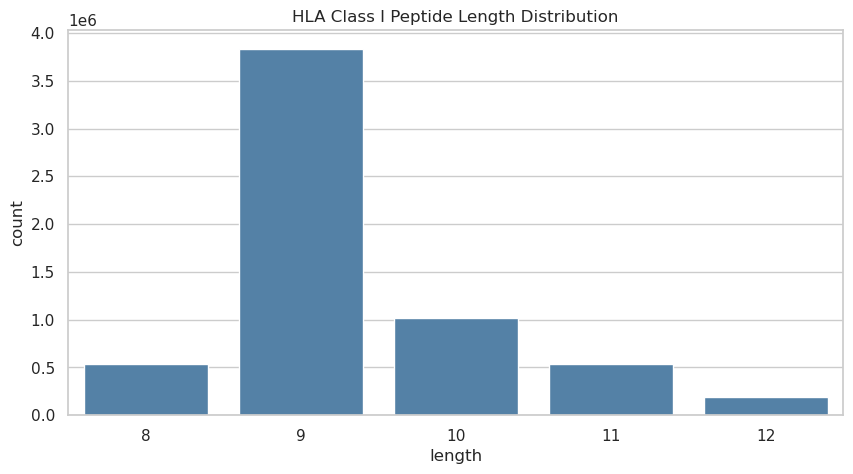

In [7]:
# Plot the length distribution of all HLA class I peptides
plt.figure(figsize=(10, 5))
df_class1 = df_atlas[df_atlas['hla_class'] == 'HLA-I'].copy()
df_class1['length'] = df_class1['peptide_sequence'].str.len()
sns.countplot(data=df_class1, x='length', color='steelblue')
plt.title('HLA Class I Peptide Length Distribution')
plt.show()

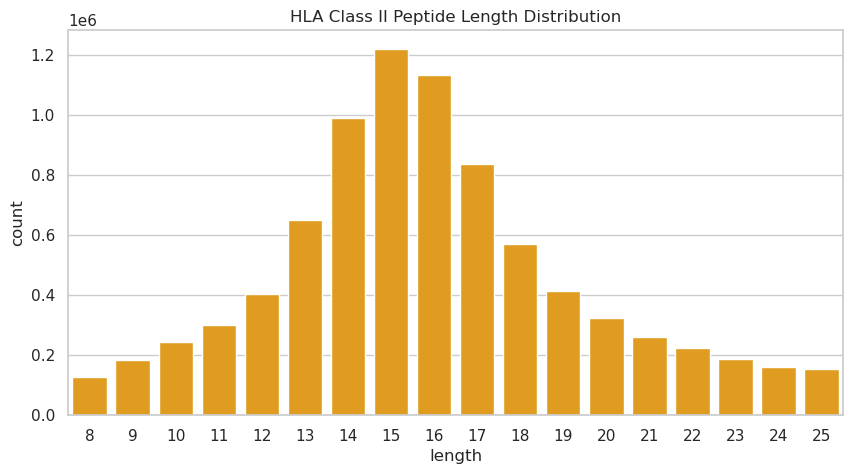

In [8]:
# Plot HLA class II peptide length distribution
plt.figure(figsize=(10, 5))
df_class2 = df_atlas[df_atlas['hla_class'] == 'HLA-II'].copy()
df_class2['length'] = df_class2['peptide_sequence'].str.len()
sns.countplot(data=df_class2, x='length', color='orange')
plt.title('HLA Class II Peptide Length Distribution')
plt.show()

Look at the Class I histogram above and answer:

1. What is the most common peptide length for Class I and II in the HLA Ligand Atlas?
2. Why might we see some 8-mers and 12-mers even though 9-mers are most common?
3. If you would see a large peak at 15-mers in Class I data, what might be wrong?

<details>
<summary><b>Click to reveal the answers</b></summary>

**1. Most common length**: 9 amino acids (9-mers), typically 60-70% of Class I peptides.

**2. 8-mers and 12-mers exist because**:
- HLA binding grooves have some flexibility
- Different HLA alleles prefer slightly different lengths
- HLA-B*08:01 tends to prefer 8-mers; some HLA-B alleles accommodate 10-11 mers
- The binding is determined by anchor residues, not strict length

**3. A 15-mer peak in Class I would indicate**:
- Possible Class II contamination in the sample
- Sample mislabeling (Class II labeled as Class I)
- Cross-contamination during immunoprecipitation
- Data processing error

This is why length distribution analysis is a key quality control step!

</details>

### 2.2.2 Allele Distribution

**Aim of this task**

Explore which HLA alleles are most represented in our dataset. Which alleles are over-represented?

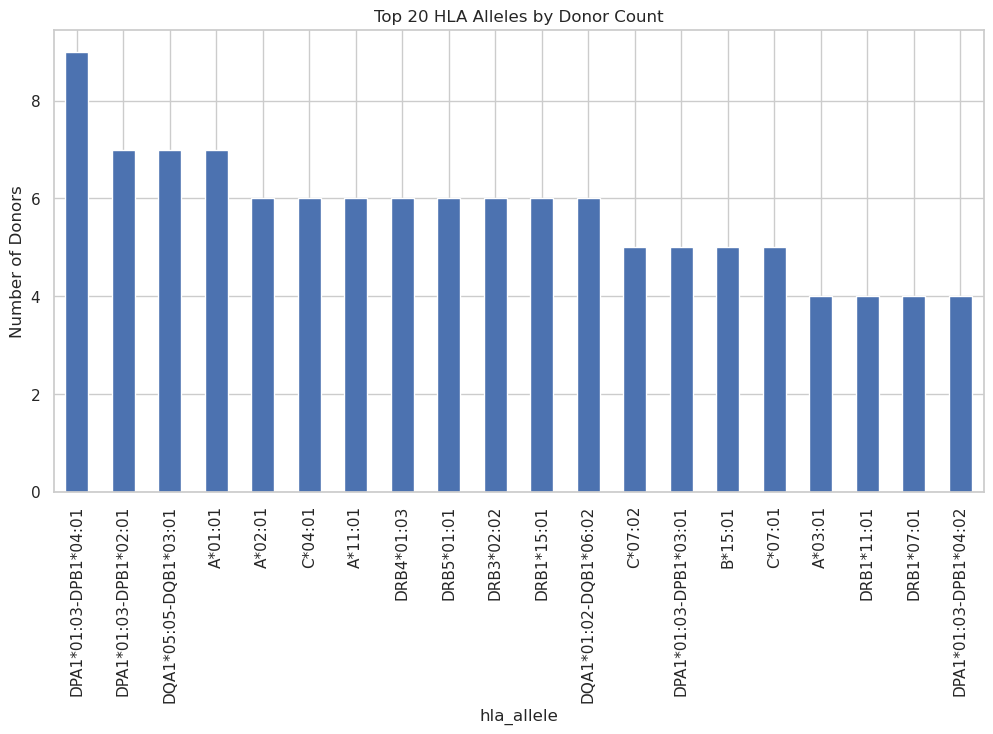

In [9]:
# Count donors per allele and plot a barplot
plt.figure(figsize=(12, 6))
df_donors.groupby('hla_allele')['donor'].nunique().sort_values(ascending=False).head(20).plot(kind='bar')
plt.title('Top 20 HLA Alleles by Donor Count')
plt.ylabel('Number of Donors')
plt.show()


### 2.2.3 Motif Analysis

**Aim of this task**

Investigate the binding motifs of peptides from UPN49

**Steps:**
1. Copy peptides to clipboard
2. Paste into [GibbsCluster-2.0](https://services.healthtech.dtu.dk/services/GibbsCluster-2.0/)
3. Compare results to the [MHC Motif Atlas](http://mhcmotifatlas.org/home)

Do you see which cluster belongs to which allele motif?

<details>
<summary><b>Deep Dive: What Are HLA Binding Motifs?</b></summary>

**Anchor Residues and Binding Pockets**

Each HLA allele has specific "pockets" that prefer certain amino acids:

```
Example: HLA-A*02:01 binding motif (9-mer)

Position:  1   2   3   4   5   6   7   8   9
           │   │                       │   │
           ▼   ▼                       ▼   ▼
Anchor:    -   L   -   -   -   -   -   -   V
           -   M   -   -   -   -   -   -   L
           
P2 = Leucine/Methionine (B pocket)
P9 = Valine/Leucine (F pocket, C-terminus)
```

**Sequence Logos**

A sequence logo visualizes amino acid preferences:
- **Height** = information content (bits) - how conserved is this position?
- **Letters** = amino acids, sized by frequency
- Tall stacks at P2 and P9 indicate strong anchor positions

**How GibbsCluster works**

1. Takes a list of peptides (unknown HLA assignment)
2. Uses unsupervised clustering to group by binding motif
3. Returns predicted motifs and cluster assignments
4. You can then match clusters to known HLA alleles

**Common Class I Motifs**:
| Allele | P2 Anchor | P9 Anchor |
|--------|-----------|----------|
| A*02:01 | L, M | V, L |
| A*01:01 | T, S | Y |
| B*07:02 | P | L |
| B*08:01 | K, R | L |

</details>

Look at the amino acid frequency of each cluster created by GibbsCluster:

1. What amino acids are enriched at position 2 (P2)?
2. What amino acids are enriched at position 9 (P9)?
3. Based on the motif reference below, which HLA allele(s) might this sample have?

<details>
<summary><b>Click for examples</b></summary>

**Reference motifs:**
| Allele | P2 | P9 |
|--------|-----|-----|
| HLA-A*02:01 | L, M | V, L |
| HLA-A*01:01 | T, S | Y |
| HLA-A*03:01 | L, V, M | K, R |
| HLA-B*07:02 | P | L |
</details>


## 3. Comparison: Tumor vs Benign

**Aim of this task**

Compare the CLL immunopeptidome against the benign HLA Ligand Atlas to identify:
- **Tumor-enriched peptides**: Found frequently in tumor, rarely in healthy tissue
- **Shared peptides**: Common to both (normal self-peptides)
- **Benign-enriched peptides**: Found in healthy tissue but not tumor

We need two datasets:
1. **Tumor peptides**: We will now work with the full CLL immunopeptidome dataset (containing UPN49). You can import the dataset from `./data/cll_warehouse_class1.tsv` using pandas.
2. **Benign peptides**: From HLA Ligand Atlas

<details>
<summary><b>Deep Dive: What is a Waterfall Plot?</b></summary>

**Concept**

A waterfall plot visualizes differential peptide presentation between two conditions:

```
Frequency
   ↑
 1.0│  ████                                    Tumor-enriched
    │  ████ ███                                (potential TAAs)
    │  ████ ███ ██                          
 0.5│  ████ ███ ██ █                        
    │  ████ ███ ██ █                        
────┼─────────────────────────────────────── Peptides →
    │                    █ ██ ███ ████      
-0.5│                    █ ██ ███ ████      
    │                       ██ ███ ████████  Benign-enriched
-1.0│                          ███ ████████  (normal self)
   ↓
```

**How to read it**:
- **Bars pointing UP**: Peptide frequency in tumor
- **Bars pointing DOWN**: Peptide frequency in benign
- **Peptides on the left**: Tumor-specific or tumor-enriched (TAA candidates)
- **Peptides on the right**: Benign-specific or benign-enriched

**Ideal TAA candidates**:
- High bar pointing up (frequent in tumor)
- No bar pointing down (absent in benign)

**Why "waterfall"?**
When sorted by tumor frequency, the plot resembles a waterfall cascading down.

</details>

In [10]:
# Load CLL HLA-I data from './data/cll_warehouse_class1.tsv'
df_cll = pd.read_csv('./data/cll_warehouse_class1.tsv', sep='\t')
df_cll.head()


,sequence,accessions,sample,binder,rank,affinity,best_allele,mz,charge,score,COMET:xcorr,spec_pearson_norm,observed_retention_time,predicted_retention_time
0,GKADGAEAKPAE,sp|P35579|MYH9_HUMAN,UPN38,False,85.0000,50000.00,HLA-B*18:01,572.285827,2,0.000724,3.019,0.873355,720.9,688.384461
1,KEILVGDVGQTV,sp|P23528|COF1_HUMAN,UPN38,True,0.1543,49.16,HLA-B*49:01,629.357649,2,0.007007,1.182,0.553623,3022.5,3096.772307
2,ATAASSSSLEKS,sp|P62736|ACTA_HUMAN;sp|P60709|ACTB_HUMAN;sp|P...,UPN38,False,62.0000,50000.00,HLA-A*25:01,569.783752,2,0.000724,1.211,0.619091,822.9,1004.579123
3,VNVEINVAPGKD,sp|P35527|K1C9_HUMAN,UPN38,False,88.3333,50000.00,HLA-B*49:01,627.837280,2,0.002500,1.420,0.677198,2601.3,2769.827266
4,REIGGGEAGAVI,sp|Q07820|MCL1_HUMAN,UPN38,True,0.4671,773.49,HLA-B*49:01,564.804748,2,0.000724,2.116,0.784888,2202.7,2206.522160


In [ ]:
# Get the HLA Ligand Atlas for HLA-I peptides and compare with CLL cohort peptides
atlas_peptides = set(df_class1['peptide_sequence'])
cll_peptides = set(df_cll['sequence'])
print(f'Atlas Class I Unique Peptides: {len(atlas_peptides)}')
print(f'CLL Cohort Unique Peptides: {len(cll_peptides)}')


Atlas Class I Unique Peptides: 90428
CLL Cohort Unique Peptides: 70606


---

### Exercise 2: Predict the Overlap


Before we create the waterfall plot:

1. What percentage of tumor peptides do you expect to find in the benign HLA Ligand Atlas?
2. Why might some true tumor peptides also appear in the benign reference?

<details>
<summary><b>Click to reveal the answers</b></summary>

**Answer 1**: Typically **70-90%** of tumor peptides are also found in benign tissue (depending on the size of the benign dataset).

This might seem surprising, but remember:
- Most peptides are from normal cellular proteins (housekeeping genes)
- The immune system already "sees" these peptides every day
- True tumor-specific peptides are a small minority

**Answer 2**: Reasons for overlap:
1. **Normal self-peptides**: From proteins expressed in both healthy and cancer cells
2. **Tissue-of-origin peptides**: Cancer cells retain some normal tissue markers
3. **Shared HLA alleles**: Different donors present similar peptides if they share HLA types
4. **Technical overlap**: Common contaminants or highly abundant proteins

**The goal** is to find the 10-30% that are tumor-enriched or even tumor-specific!

</details>

---

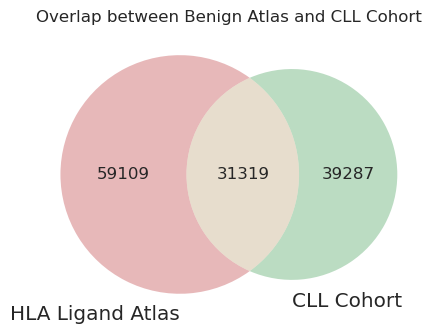

In [12]:
# Plot venn diagram of HLA Ligand Atlas and CLL Cohohrt
plt.figure(figsize=(5, 5))
venn2([atlas_peptides, cll_peptides], set_labels=('HLA Ligand Atlas', 'CLL Cohort'))
plt.title('Overlap between Benign Atlas and CLL Cohort')
plt.show()


### 3.1 Calculate Peptide Frequencies

**Aim of this task**

Calculate how frequently each peptide appears across samples:

$$\text{Frequency} = \frac{\text{Number of samples with peptide}}{\text{Total samples in group}}$$

**Filtering**: Remove "one-hit wonders" (peptides seen in only 1 sample) to reduce noise.

In [13]:
# Filter out one hit wonders
# Count samples per peptide in CLL
cll_counts = df_cll.groupby('sequence')['sample'].nunique()
keep_cll = cll_counts[cll_counts > 1].index

# Count donors per peptide in Atlas
atlas_counts = df_class1.groupby('peptide_sequence')['donor'].nunique()
keep_atlas = atlas_counts[atlas_counts > 1].index

# Compute frequencies
n_cll_samples = df_cll['sample'].nunique()
n_atlas_donors = df_donors['donor'].nunique()

freq_cll = cll_counts[keep_cll] / n_cll_samples
freq_atlas = atlas_counts[keep_atlas] / n_atlas_donors

print(f'Filtered CLL Peptides: {len(freq_cll)}')
print(f'Filtered Atlas Peptides: {len(freq_atlas)}')


Filtered CLL Peptides: 33445
Filtered Atlas Peptides: 39013


### 3.2 Create the Waterfall Plot

**Aim of this task**

Visualize the comparison:
- Tumor frequency as positive (upward) bars
- Benign frequency as negative (downward) bars
- Compute the ratio of tumor to benign frequency
- Sort by this ratio and then by tumor frequency (descending)
- [Reference plot](https://www.frontiersin.org/files/Articles/705974/fimmu-12-705974-HTML/image_m/fimmu-12-705974-g001.jpg)

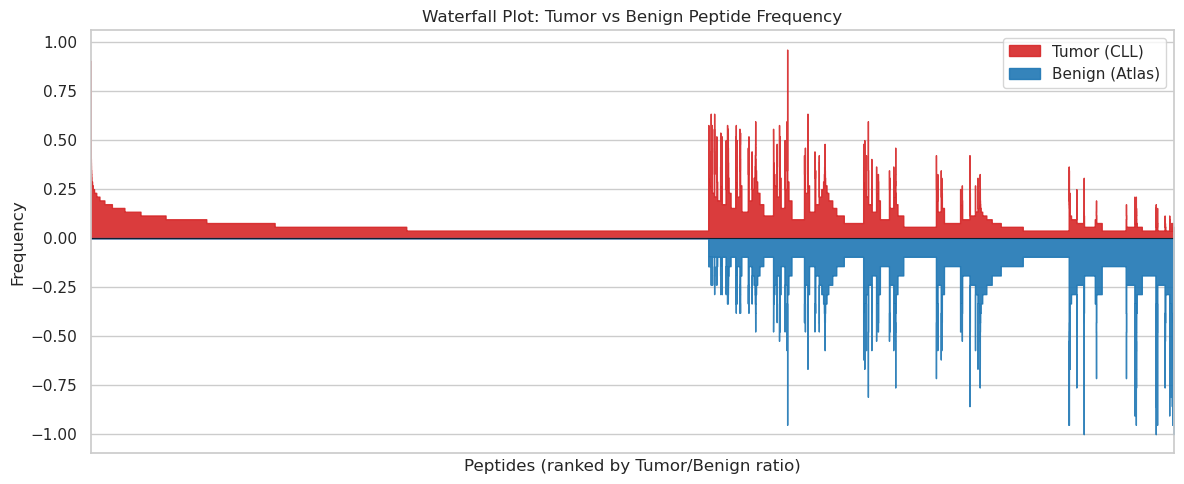

Total peptides plotted: 33,445


In [16]:

# Task 3.2: Efficient Waterfall Plot
# Build waterfall dataframe - focus on CLL peptides
df_waterfall = pd.DataFrame({
    'freq_cll': freq_cll,
    'freq_atlas': freq_atlas.reindex(freq_cll.index, fill_value=0)
})

# Calculate ratio and sort (tumor-enriched on left)
df_waterfall['ratio'] = df_waterfall['freq_cll'] / (df_waterfall['freq_atlas'] + 1e-4)
df_waterfall = df_waterfall.sort_values(['ratio', 'freq_cll'], ascending=[False, False]).reset_index()
df_waterfall.rename(columns={'index': 'peptide'}, inplace=True)

# Efficient plotting using fill_between instead of individual bars
fig, ax = plt.subplots(figsize=(12, 5))
x = np.arange(len(df_waterfall))

ax.fill_between(x, 0, df_waterfall['freq_cll'].values, 
                color='#d62728', alpha=0.9, label='Tumor (CLL)')
ax.fill_between(x, 0, -df_waterfall['freq_atlas'].values, 
                color='#1f77b4', alpha=0.9, label='Benign (Atlas)')

ax.axhline(0, color='black', linewidth=0.5)
ax.set_xlabel('Peptides (ranked by Tumor/Benign ratio)')
ax.set_ylabel('Frequency')
ax.set_title('Waterfall Plot: Tumor vs Benign Peptide Frequency')
ax.set_xlim(0, len(df_waterfall))
ax.set_xticks([])
ax.legend(loc='upper right')
plt.tight_layout()
plt.show()

print(f"Total peptides plotted: {len(df_waterfall):,}")

---

### Exercise 3: Interpret the Waterfall Plot

Look at the waterfall plot above and answer:

1. What does the "waterfall" shape tell you about the data?
2. Why are the leftmost (tumor-only) bars important?
3. What would a "flat" plot indicate?

<details>
<summary><b>Click to reveal the answers</b></summary>

**Answer 1: Waterfall shape interpretation**

The descending "waterfall" from left to right shows:
- Left side: Peptides with HIGH tumor frequency
- Right side: Peptides with LOW tumor frequency
- The steepness indicates how many peptides are at each frequency level

**Answer 2: Dark red bars (tumor-only)**

These are the most promising TAA candidates because:
- Present in tumor (detected in patient)
- Absent in benign (not normal self-peptide)
- Less likely to cause autoimmunity if targeted
- Potentially tumor-specific or over-expressed

**Answer 3: A flat plot would indicate**
- All peptides at similar frequency
- No clear tumor-enriched or benign-enriched populations
- Could mean:
  - Sample quality issues
  - Wrong comparison (mismatched HLA types)
  - The tumor is very similar to normal tissue

</details>

---

In [ ]:
# Show top 10 most suitable TAA candidates
top_candidates = df_waterfall.head(10)
top_candidates

In [ ]:
# Check if UPN49 has one of the top candidates
upn49_peptides = set(df_cll[df_cll['sample'] == 'UPN49']['sequence'])
matches = top_candidates[top_candidates['peptide'].isin(upn49_peptides)]
print('Top candidates found in UPN49:')
matches

### 3.3 Re-do waterfall with A*02:01 restricted background (Advanced)
Since UPN49 is A*02:01 positive, let's restrict the Atlas background to design vaccine targets only for A*02:01+ donors.
>**Note**: The number of samples subcohort of the HLA Ligand Atlas is not sufficient to perform this analysis. For the scope of this workshop it is sufficient though.

**Aim of this task**

Re-do the analysis from 3.2, but this time only consider A*02:01+ donors.


A*02:01+ Atlas donors: 6
A*02:01 Atlas peptides: 40,246
A*02:01 CLL samples: 29
A*02:01 CLL peptides: 5,803


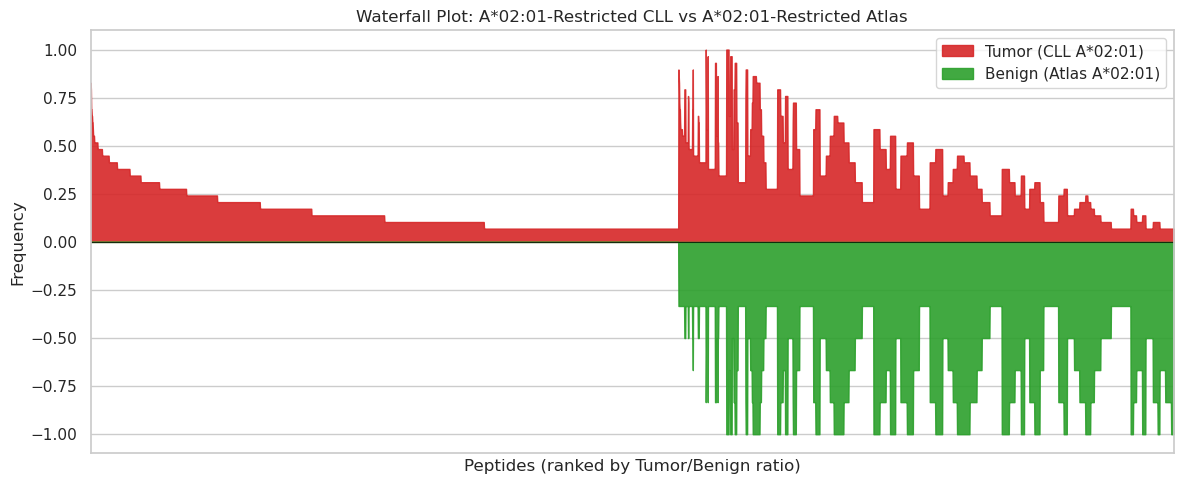


Total A*02:01 peptides plotted: 3,850

Top 10 TAA candidates (A*02:01 restricted):


,sequence,freq_cll,freq_atlas
0,GLMKKAYEL,0.827586,0.0
1,KLLESVASA,0.793103,0.0
2,SMPDFDLHL,0.689655,0.0
3,TLIDLPGITRV,0.689655,0.0
4,LLSAEPVPA,0.655172,0.0
5,LLSDTVQHL,0.655172,0.0
6,ILSVVNSQL,0.620690,0.0
7,KMDPIISRV,0.620690,0.0
8,TTLEQPPSV,0.586207,0.0
9,GLQEHSISV,0.551724,0.0


In [37]:
# Task 3.3: A*02:01 Restricted Waterfall Plot (Fair Comparison)
# Filter Atlas for donors with A*02:01 allele
a02_donors = df_donors[df_donors['hla_allele'].str.contains(r'A\*02:01', regex=True)]['donor'].unique()
df_class1_a02 = df_class1[df_class1['donor'].isin(a02_donors)]

# Filter CLL for peptides predicted to bind A*02:01
df_cll_a02 = df_cll[df_cll['best_allele'].str.contains('A\\*02:01', regex=True, na=False)]

print(f"A*02:01+ Atlas donors: {len(a02_donors)}")
print(f"A*02:01 Atlas peptides: {df_class1_a02['peptide_sequence'].nunique():,}")
print(f"A*02:01 CLL samples: {df_cll_a02['sample'].nunique()}")
print(f"A*02:01 CLL peptides: {df_cll_a02['sequence'].nunique():,}")

# Recalculate frequencies for A*02:01 restricted datasets
cll_counts_a02 = df_cll_a02.groupby('sequence')['sample'].nunique()
freq_cll_a02 = cll_counts_a02[cll_counts_a02 > 1] / df_cll_a02['sample'].nunique()

counts_atlas_a02 = df_class1_a02.groupby('peptide_sequence')['donor'].nunique()
freq_atlas_a02 = counts_atlas_a02[counts_atlas_a02 > 1] / len(a02_donors)

# Build waterfall dataframe with A*02:01 restricted data on both sides
df_waterfall_a02 = pd.DataFrame({
    'freq_cll': freq_cll_a02,
    'freq_atlas': freq_atlas_a02.reindex(freq_cll_a02.index, fill_value=0)
})
df_waterfall_a02['ratio'] = df_waterfall_a02['freq_cll'] / (df_waterfall_a02['freq_atlas'] + 1e-4)
df_waterfall_a02 = df_waterfall_a02.sort_values(['ratio', 'freq_cll'], ascending=[False, False]).reset_index()
df_waterfall_a02.rename(columns={'index': 'peptide'}, inplace=True)

# Efficient plotting using fill_between
fig, ax = plt.subplots(figsize=(12, 5))
x = np.arange(len(df_waterfall_a02))

ax.fill_between(x, 0, df_waterfall_a02['freq_cll'].values, 
                color='#d62728', alpha=0.9, label='Tumor (CLL A*02:01)')
ax.fill_between(x, 0, -df_waterfall_a02['freq_atlas'].values, 
                color='#2ca02c', alpha=0.9, label='Benign (Atlas A*02:01)')

ax.axhline(0, color='black', linewidth=0.5)
ax.set_xlabel('Peptides (ranked by Tumor/Benign ratio)')
ax.set_ylabel('Frequency')
ax.set_title('Waterfall Plot: A*02:01-Restricted CLL vs A*02:01-Restricted Atlas')
ax.set_xlim(0, len(df_waterfall_a02))
ax.set_xticks([])
ax.legend(loc='upper right')
plt.tight_layout()
plt.show()

# Show top candidates
print(f"\nTotal A*02:01 peptides plotted: {len(df_waterfall_a02):,}")
print("\nTop 10 TAA candidates (A*02:01 restricted):")
df_waterfall_a02.drop('ratio', axis=1).head(10)

## 5. Bonus: Binding Prediction

Are our CLL peptides actually good HLA binders?
Let's revisit the CLL data and look at the binding predictions that were already computed. 

### 5.1 Binding Affinity vs Percentile Rank

**Key concepts:**

- **Binding Affinity (IC50)**: Predicted concentration for 50% inhibition (Abbrev. `BA`)
  - Lower = Stronger binder
  - <50 nM = Strong binder
  - <500 nM = Weak binder
  - >500 nM = Non-binder

- **Percentile Rank**: How this peptide compares to random peptides (Abbrev.`rank`)
  - Lower = Better binder
  - <0.5% = Strong binder
  - <2% = Weak binder
  - >2% = Non-binder

**We typically use Percentile Rank for filtering** because it's comparable across alleles.

<details>
<summary><b>Deep Dive: IC50 vs Percentile Rank - Which Should You Use?</b></summary>

**The Problem with IC50**

IC50 values are not comparable across HLA alleles:

```
HLA-A*02:01: Average IC50 of good binders = ~50 nM
HLA-B*08:01: Average IC50 of good binders = ~200 nM
```

Using a fixed cutoff (e.g., <500 nM) would include:
- Many weak A*02:01 binders (false positives)
- Too few B*08:01 binders (false negatives)

**The Solution: Percentile Rank**

For each allele, MHCFlurry/NetMHCpan/MixMHCpred...:
1. Predicts binding for 100,000+ random peptides
2. Ranks your peptide against this background
3. Returns the percentile (what % of random peptides bind better)

| Rank | Interpretation | Typical Use |
|------|---------------|-------------|
| <0.5% | Strong binder | High-confidence targets |
| 0.5-2% | Weak binder | Include with caution |
| >2% | Non-binder | Usually exclude |

**Recommendation**: Use percentile rank <2% as your standard cutoff.

</details>

In [34]:
# Revisit initial CLL dataset again
df_cll.head(5)

,sequence,accessions,sample,binder,rank,affinity,best_allele,mz,charge,score,COMET:xcorr,spec_pearson_norm,observed_retention_time,predicted_retention_time
0,GKADGAEAKPAE,sp|P35579|MYH9_HUMAN,UPN38,False,85.0000,50000.00,HLA-B*18:01,572.285827,2,0.000724,3.019,0.873355,720.9,688.384461
1,KEILVGDVGQTV,sp|P23528|COF1_HUMAN,UPN38,True,0.1543,49.16,HLA-B*49:01,629.357649,2,0.007007,1.182,0.553623,3022.5,3096.772307
2,ATAASSSSLEKS,sp|P62736|ACTA_HUMAN;sp|P60709|ACTB_HUMAN;sp|P...,UPN38,False,62.0000,50000.00,HLA-A*25:01,569.783752,2,0.000724,1.211,0.619091,822.9,1004.579123
3,VNVEINVAPGKD,sp|P35527|K1C9_HUMAN,UPN38,False,88.3333,50000.00,HLA-B*49:01,627.837280,2,0.002500,1.420,0.677198,2601.3,2769.827266
4,REIGGGEAGAVI,sp|Q07820|MCL1_HUMAN,UPN38,True,0.4671,773.49,HLA-B*49:01,564.804748,2,0.000724,2.116,0.784888,2202.7,2206.522160


In [21]:
# Task 4: Binding Prediction Analysis for ALL CLL samples
# Calculate purity (% binders) for each sample in the cohort

def calculate_sample_purity(df, sample_col='sample', rank_col='rank', threshold=2.0):
    """Calculate purity for each sample: % of peptides with rank < threshold"""
    purity_data = []
    for sample in df[sample_col].unique():
        sample_df = df[df[sample_col] == sample]
        # Get best rank per peptide
        best_ranks = sample_df.groupby('sequence')[rank_col].min()
        n_total = len(best_ranks)
        n_binders = (best_ranks < threshold).sum()
        purity = n_binders / n_total * 100 if n_total > 0 else 0
        purity_data.append({
            'sample': sample,
            'n_peptides': n_total,
            'n_binders': n_binders,
            'purity': purity
        })
    return pd.DataFrame(purity_data)

# Calculate purity for all CLL samples
df_purity = calculate_sample_purity(df_cll)
df_purity = df_purity.sort_values('purity', ascending=False)

print(f"CLL Cohort Purity Analysis (n={len(df_purity)} samples)")
print(f"  Mean purity: {df_purity['purity'].mean():.1f}%")
print(f"  Median purity: {df_purity['purity'].median():.1f}%")
print(f"  Range: {df_purity['purity'].min():.1f}% - {df_purity['purity'].max():.1f}%")

df_purity.head(10)

CLL Cohort Purity Analysis (n=52 samples)
  Mean purity: 95.0%
  Median purity: 97.2%
  Range: 74.2% - 98.9%


,sample,n_peptides,n_binders,purity
0,UPN38,2719,2690,98.933431
43,UPN37,3707,3664,98.840032
40,UPN47,3357,3318,98.838248
51,UPN40,9662,9521,98.540675
35,UPN48,3670,3615,98.501362
18,UPN01,1585,1561,98.485804
44,UPN14,949,934,98.419389
10,UPN31,9593,9437,98.373814
38,UPN03,1448,1424,98.342541
4,UPN49,3973,3906,98.313617



Quality assessment:
  High quality (≥70%): 52 samples
  Moderate quality (50-70%): 0 samples
  Low quality (<50%): 0 samples


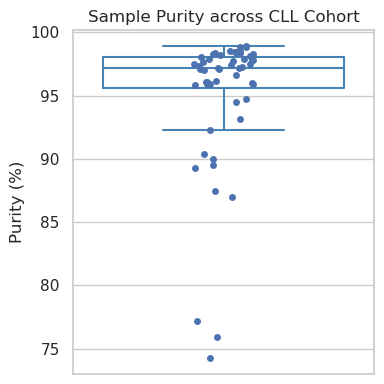

In [32]:
# Task 4: Visualize Sample Purity across CLL Cohort
plt.figure(figsize=(4, 4))
sns.boxplot(data=df_purity, y='purity', color='steelblue', fliersize=0, fill=False)
sns.stripplot(data=df_purity, y='purity', jitter=True)
plt.title('Sample Purity across CLL Cohort')
plt.ylabel('Purity (%)')
plt.tight_layout()


# Summary statistics
print(f"\nQuality assessment:")
print(f"  High quality (≥70%): {(df_purity['purity'] >= 70).sum()} samples")
print(f"  Moderate quality (50-70%): {((df_purity['purity'] >= 50) & (df_purity['purity'] < 70)).sum()} samples")
print(f"  Low quality (<50%): {(df_purity['purity'] < 50).sum()} samples")

---

### Exercise 4: Interpret the Purity Results

Based on the purity analysis above:

1. Is this a high-quality immunopeptidomics sample? What purity would you expect?
2. Why might some true HLA ligands be predicted as non-binders?
3. How would you interpret a sample with only 30% purity?

<details>
<summary><b>Click to reveal the answers</b></summary>

**1. Quality expectations**:
- High-quality samples: 70-90% binders (rank < 2%)
- Good samples: 50-70% binders
- Poor samples: <50% binders

**2. True ligands predicted as non-binders could be due to**:
- Prediction tool limitations (not all alleles modeled equally well)
- Novel binding modes not in training data
- Post-translational modifications not considered
- Peptides binding to alleles not in our samplesheet (bad HLA typing)

**3. Low purity (30%) interpretations**:
- Sample contamination with non-HLA peptides
- Incorrect HLA typing (wrong alleles specified)
- Technical issues during immunoprecipitation
- Allele not well-represented in prediction tool

**Action**: Always investigate low-purity samples before downstream analysis!

</details>

---

## Summary

Congratulations! You've completed the Combined Immunopeptidomics Workflow. You learned:

| Topic | Key Concept |
|-------|-------------|
| **Discovery** | Used `nf-core/mhcquant` to identify peptides from raw CLL data |
| **Reference** | Used HLA Ligand Atlas as a benign baseline for comparison |
| **Comparison** | Created Waterfall Plots to identify Tumor-Associated Antigens (TAAs) |
| **Quality** | Verified peptide quality using Length distribution and Binding Prediction |


## Resources

- **HLA Ligand Atlas**: https://hla-ligand-atlas.org/
- **nf-core/mhcquant**: https://nf-co.re/mhcquant/
- **nf-core/epitopeprediction**: https://nf-co.re/epitopeprediction/
- **GibbsCluster**: https://services.healthtech.dtu.dk/services/GibbsCluster-2.0/
- **MHC Motif Atlas**: http://mhcmotifatlas.org/